# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БФИ2001 Вострикова Полина Владимировна
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
import copy
import math
import pandas as pd
import queue
import matplotlib.pyplot as plt
import networkx as nx
import time
import random

In [2]:
# Чтение из файла
def read_matrix(txt):
    with open(txt, "r", encoding = "utf-8") as file:
        matrix = [[int(num) for num in line.split(" ")] for line in file]
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][j] == 0:
                    matrix[i][j] = math.inf
    return matrix

In [3]:
# Создание графа, используя матрицу смежности
def create_graph(matrix):
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                graph.add_edge(i + 1, j + 1, weight = matrix[i][j], label = matrix[i][j]) # добавляем рёбра
    return graph

In [4]:
# Визуализация гарфа
def graph_visualization(graph, path, start, end):
    pos = nx.spring_layout(graph) # Список позиций узлов
    # отрисовка кратчайшего пути
    pos2 =  copy.copy(pos)
    graph2 = copy.deepcopy(graph)
    # закрашивание "лишнего"
    pos3 =  copy.copy(pos)
    graph3 = copy.deepcopy(graph)
    start_and_end_nodes = [start, end]
    
    # удаление "лишнего" в списке позиций узлов
    for key in pos:
        if not key in path:
            del pos2[key]
        if not key in start_and_end_nodes:
            del pos3[key]
           
    # удаление "лишнего" в графе
    for i in range (len(graph)):
        if not (i+1) in path:
            graph2.remove_node(i+1)
        if not (i+1) in start_and_end_nodes:
            graph3.remove_node(i+1)
            
    # отрисовка
    nx.draw(graph, pos, with_labels = True, font_weight = 'heavy', font_color = 'white', node_color = 'black', edge_color='black')
    nx.draw(graph2, pos2, with_labels = True, font_weight = 'heavy', font_color = 'white', node_color = 'green', edge_color='green')
    if (pos2 != pos3) and (graph2 != graph3):
        nx.draw(graph3, pos3, with_labels = True, font_weight = 'heavy', font_color = 'white', node_color = 'green', edge_color='black')

    # добавление веса
    edge_weight = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_weight)
    
    plt.show()

Матрица смежности: [[inf, inf, inf, 1], [inf, 4, 5, 3], [1, 4, inf, inf], [inf, inf, 4, inf]]
Путь с минимальным весом от узла 4 до узла 2 : 4->3->2
--- 0.265 ms ---


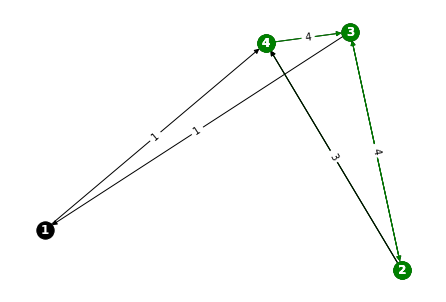

In [5]:
# Алгоритм Флойда-Уоршелла
# поиск min пути для заданных вершин
def get_path(P, start, end):
    start -= 1
    end -= 1
    result = [start]
    while start != end:
        start = P[start][end] # промежуточным вершинам, через которые нужно пройти
        result.append(start)
    result = [el + 1 for el in result]
    return result

# сам алг. поиска min путей от всех вершин ко всем вершинам
def Floyd_Marshall_algorithm(matrix):
    M = copy.deepcopy(matrix)
    N = len(M)
    # для определения кр пути из одной вершины в др
    P = [[0 for i in range(N)] for j in range(N)] # матрица, как м. смежности, но с значениями 0
    # всем не inf значениям присваиваем порядковый номер-1
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] != math.inf:
                P[i][j] = j
    for i in range(len(M)):
        for j in range(len(M)):
            if i == j: continue
            if M[i][j] != math.inf:
                # проходим по всем вершинам графа, 
                for k in range(len(M)):
                    if i == k or j == k: continue
                    # если сумма (когда мы проходим через доп. вершину) меньше уже записанного значения в м.с., то...
                    if M[i][k] > M[i][j] + M[j][k]: 
                        M[i][k] = M[i][j] + M[j][k] # ...заменяем значение и...
                        P[i][k] = P[i][j] # ...записываем через какую вершину нужно пройти, чтобы был такой min вес
    return (P)


matrix = read_matrix('4x4_few_matrix.txt')
print("Матрица смежности:", matrix)

start_time = time.perf_counter()  
result = Floyd_Marshall_algorithm(matrix)
start = 4
end = 2
path = get_path(result, start, end) # возвращает путь
s = ""
for el in path: 
    s += str(el)
    s += "->"
if len(path) == 1:
    print("Невозможно добраться от узла", start, "до узла", end) 
else:
    print("Путь с минимальным весом от узла", start, "до узла", end, ":", s[:len(s)-2])  
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

graph = create_graph(matrix)
graph_visualization(graph, path, start, end)

Матрица смежности: [[5, inf, 7, 1], [inf, 4, inf, 3], [1, 4, inf, inf], [6, inf, 4, inf]]
Путь с минимальным весом от узла 4 до узла 2 : 4->3->2
--- 0.349 ms ---


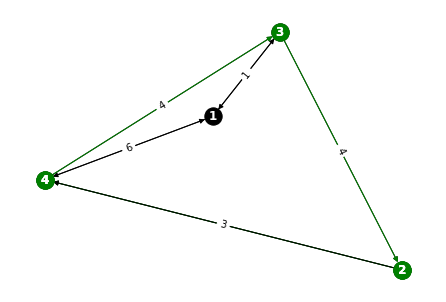

In [6]:
# Алгоритм Дейкстры 
def Dijkstra_algorithm(M, start, end):
    matrix = copy.deepcopy(M)
    start -= 1
    end -= 1
    number_of_vertices = len(matrix) # число вершин в графе
    D = [matrix[start][i] for i in range(number_of_vertices)] # по-сути, копируем строку поряд.н. start
    D[start] = 0 # нулевой вес для стартовой вершины
    P = [[start] for i in range(number_of_vertices)]
    checked_nodes = {start} # множество для вершин, которые мы уже просмотрели
    # пока не пройдём все вершины...
    for i in range(number_of_vertices):
        temp_min = math.inf
        node = None
        # ищем min вес от текущей вершины до другой среди всех соседних
        for j in range(number_of_vertices):
            if D[j] < temp_min and j not in checked_nodes:
                temp_min = D[j]
                node = j
                checked_nodes.add(node)
        if node is not None:
            for k in range(number_of_vertices):
                # если вес меньше, обнов. длину кр. пути, сохр. узел
                if D[k] > matrix[node][k] + D[node]:
                    D[k] = matrix[node][k] + D[node]
                    P[k] = copy.deepcopy(P[node])
                    P[k].append(node)
        else:
            break
    
    # формирование P
    for i in range(number_of_vertices):
        if D[i] != math.inf and P[i][0] != i:
            P[i].append(i)
            
    # вывод резов
    if D[end] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[end]]
    return (D, path, P) # D содержит инфу о min весе от узла start до всех остальных узлов, а P - пути кратчайшие 
                            # (path просто выводит нужный нам путь в правильном виде)
matrix = read_matrix('4x4_many_matrix.txt')
print("Матрица смежности:", matrix)

start_time = time.perf_counter()  
start = 4
end = 2
result  = Dijkstra_algorithm(matrix, start, end)
path = result[1]
s = ""
for el in path: 
    s += str(el)
    s += "->"
if len(path) == 1:
    print("Невозможно добраться от узла", start, "до узла", end) 
else:
    print("Путь с минимальным весом от узла", start, "до узла", end, ":", s[:len(s)-2]) 
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

graph = create_graph(matrix)
graph_visualization(graph, path, start, end)

Матрица смежности: [[inf, 3, 1, 3, inf, inf], [inf, inf, 4, inf, inf, inf], [1, inf, inf, inf, 7, inf], [3, inf, inf, inf, inf, 2], [inf, inf, inf, inf, inf, inf], [inf, inf, 5, inf, 4, inf]]
Путь с минимальным весом от узла 6 до узла 4 : 6->3->1->4
--- 0.303 ms ---


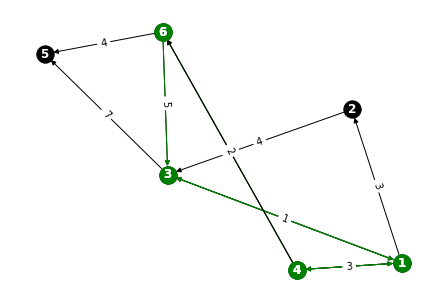

In [7]:
# Алгоритм Беллмана-Форда
def Bellman_Ford_algorithm(matrix, start, end):
    start -= 1
    end -= 1
    N = len(matrix)
    cycle = False # наличие/отсутствие цикла
    A = [[math.inf for i in range(N)] for j in range(N)] # расстояния от исх. вер. до всех остальных инициализируются как inf
    P = [[start] for i in range(N)]
    A[0][start] = 0 # расстояние до самого start принимается равным 0
    # вычисляются самые короткие расстояния
    for k in range(1, N):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(N):
            for j in range(N):
                if matrix[i][j] == math.inf:
                    continue
                # если текущий вес больше проверяемого, то обновляем
                if A[k][j] > A[k - 1][i] + matrix[i][j]:
                    A[k][j] = A[k - 1][i] + matrix[i][j]
                    P[j] = copy.deepcopy(P[i])
                    P[j].append(j)
    # проверка цикла
    if A[-1] != A[-2]:
        cycle = True
        
    # вывод резов
    if A[-1][end] == math.inf or len(P[end]) == 1:
        path = []
    else:
        path = [el + 1 for el in P[end]]
    return (A[-1], path, P, cycle)# A[-1] содержит инфу о min весе от узла start до всех остальных узлов, а P - пути кратчайшие 
                            # (path просто выводит нужный нам путь в правильном виде)
                            # cycle - проверка налич. отриц. цикла

matrix = read_matrix('6x6_few_matrix.txt')
print("Матрица смежности:", matrix)

start_time = time.perf_counter()  
start = 6
end = 4
result = Bellman_Ford_algorithm(matrix, start, end)
path = result[1]
s = ""
for el in path: 
    s += str(el)
    s += "->"
if len(path) == 1:
    print("Невозможно добраться от узла", start, "до узла", end) 
else:
    print("Путь с минимальным весом от узла", start, "до узла", end, ":", s[:len(s)-2]) 
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

graph = create_graph(matrix)
graph_visualization(graph, path, start, end)

Матрица смежности: [[inf, 3, inf, 3, 1, inf], [inf, inf, 4, inf, inf, 8], [1, inf, inf, inf, 7, 5], [3, inf, inf, 2, inf, 2], [inf, 7, inf, inf, 1, inf], [7, inf, 5, inf, 4, inf]]
Путь с минимальным весом от узла 5 до узла 6 : 5->2->6
--- 0.614 ms ---


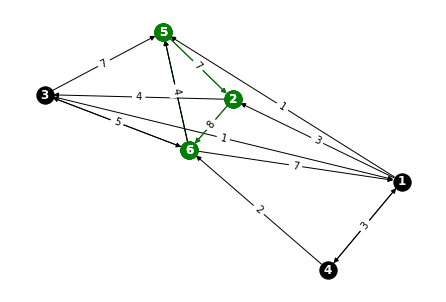

In [8]:
# Алгоритм Джонсона
def Johnson_algorithm(M, start, end):
    start -= 1
    end -= 1
    Ford_m = copy.deepcopy(M) # для вызова Форда
    matrix = copy.deepcopy(M)
    N = len(matrix)
    for i in range(N):
        Ford_m[i].append(math.inf) # добавили по одному inf в каждую строку в конец
    Ford_m.append([0 for i in range(N + 1)]) # добавили в конец [0, 0, 0, 0, 0, 0, 0]
    Ford_result = Bellman_Ford_algorithm(Ford_m, N + 1, 1)
    
    # если есть циклы с отриц весом, то всё, конец
    if Ford_result[3] == True:
        return ([], [], [])
    
    # для каждого ребра: изменяем веса дуг, используя значения кратчайших путей, которые получили выше
    # (меняется, если есть рёбра с отрицательным весом, но отсутствуют циклы с отрицательным весом)
    for i in range(N):
        for j in range(N):
            if matrix[i][j] != math.inf and Ford_result[0][i] != math.inf and Ford_result[0][j] != math.inf:
                matrix[i][j] += Ford_result[0][i] - Ford_result[0][j]
    
    distArr = []
    pathArr = []
    # вычисляем min путь с помощью Дейкстры 
    for i in range(N):
        dijkstra_result = Dijkstra_algorithm(matrix, i + 1, i + 1)
        distArr.append(dijkstra_result[0])
        pathArr.append(dijkstra_result[2])
        
    # чтобы получить веса для исходного графа
    for i in range(N):
        for j in range(N):
            if distArr[i][j] != math.inf and Ford_result[0][i] != math.inf and Ford_result[0][j] != math.inf:
                distArr[i][j] += Ford_result[0][j] - Ford_result[0][i]
    
    return (distArr, [el + 1 for el in pathArr[start][end]], pathArr)
    # distArr содержит инфу о min весе от всех узлов до всех узлов, а pathArr - пути кратчайшие 
    # ([el + 1 for el in pathArr[start][end]] выводит нужный нам путь в правильном виде)

matrix = read_matrix('6x6_many_matrix.txt')
print("Матрица смежности:", matrix)

start_time = time.perf_counter()  
start = 5
end = 6
result = Johnson_algorithm(matrix, start, end)
path = result[1]
s = ""
for el in path: 
    s += str(el)
    s += "->"
if len(path) == 1:
    print("Невозможно добраться от узла", start, "до узла", end) 
else:
    print("Путь с минимальным весом от узла", start, "до узла", end, ":", s[:len(s)-2]) 
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

graph = create_graph(matrix)
graph_visualization(graph, path, start, end)

Матрица смежности: [[inf, 3, inf, 2, inf, inf, 7, inf, inf, inf], [7, inf, inf, 1, inf, inf, inf, inf, inf, inf], [inf, inf, inf, inf, 9, inf, inf, inf, inf, inf], [1, inf, inf, inf, inf, inf, inf, 9, inf, inf], [inf, inf, 1, inf, inf, inf, inf, 8, inf, 3], [inf, inf, 3, inf, inf, inf, inf, inf, inf, inf], [inf, inf, inf, inf, inf, 9, inf, inf, inf, inf], [inf, inf, inf, inf, inf, inf, 1, inf, inf, 1], [inf, 5, inf, inf, inf, 2, inf, inf, 3, inf], [inf, inf, inf, inf, 1, inf, inf, inf, 5, inf]]
Путь с минимальным весом от узла 3 до узла 2 : 3->5->10->9->2
--- 0.402 ms ---


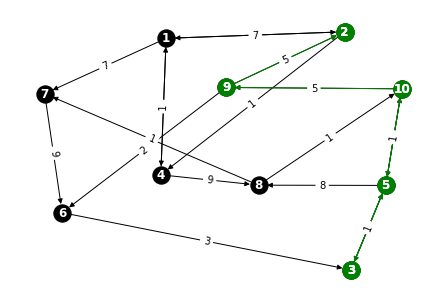

In [9]:
# Алгоритм Левита 
def Levit_algorithm(M, start, end):
    start -= 1
    end -= 1
    matrix = copy.deepcopy(M)
    N = len(matrix)
    paths = [[start] for i in range(N)]
    distance = [math.inf for i in range(N)]
    distance[start] = 0
    M0 = set()
    M1 = {"Main_queue" : [start], "Urgent_queue": []}
    M2 = set(range(N))
    M2.remove(start) # Удаляет указанный элемент из множества
    while len(M1["Main_queue"]) or len(M1["Urgent_queue"]):
        if len(M1["Urgent_queue"]):
            current_node = M1["Urgent_queue"].pop(0)
        else:
            current_node = M1["Main_queue"].pop(0)
        for temporary_node in range(N):
            if distance[temporary_node] == math.inf and matrix[current_node][temporary_node] == math.inf:
                continue
            if temporary_node in M2:
                M2.remove(temporary_node)
                calculated_distance = distance[current_node] + matrix[current_node][temporary_node]
                if calculated_distance < distance[temporary_node]:
                    distance[temporary_node] = calculated_distance
                    paths[temporary_node] = copy.deepcopy(paths[current_node])
                    paths[temporary_node].append(temporary_node)
                M1["Main_queue"].append(temporary_node)
            elif temporary_node in M1["Main_queue"] or temporary_node in M1["Urgent_queue"]:
                calculated_distance = distance[current_node] + matrix[current_node][temporary_node]
                if calculated_distance < distance[temporary_node]:
                    distance[temporary_node] = calculated_distance
                    paths[temporary_node] = copy.deepcopy(paths[current_node])
                    paths[temporary_node].append(temporary_node)
            elif temporary_node in M0 and distance[temporary_node] > distance[current_node] + matrix[current_node][temporary_node]:
                M0.remove(temporary_node)
                M1["Urgent_queue"].append(temporary_node)
                calculated_distance = distance[current_node] + matrix[current_node][temporary_node]
                if calculated_distance < distance[temporary_node]:
                    distance[temporary_node] = calculated_distance
                    paths[temporary_node] = copy.deepcopy(paths[current_node])
                    paths[temporary_node].append(temporary_node)
        M0.add(current_node)
    return distance, [el + 1 for el in paths[end]], paths
    # distance содержит инфу о min весе от всех узлов до всех узлов, а paths - пути кратчайшие 
    # ([el + 1 for el in paths[end]] выводит нужный нам путь в правильном виде)

matrix = read_matrix('10x10_few_matrix.txt')
print("Матрица смежности:", matrix)

start_time = time.perf_counter()  
start = 3
end = 2
result = Levit_algorithm(matrix, start, end)
path = result[1]
s = ""
for el in path: 
    s += str(el)
    s += "->"
if len(path) == 1:
    print("Невозможно добраться от узла", start, "до узла", end) 
else:
    print("Путь с минимальным весом от узла", start, "до узла", end, ":", s[:len(s)-2]) 
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

graph = create_graph(matrix)
graph_visualization(graph, path, start, end)

Матрица смежности: [[inf, 3, 5, 2, 9, inf, 7, 6, 1, inf], [7, inf, inf, 1, inf, inf, 3, inf, inf, 4], [inf, inf, inf, inf, 9, inf, inf, inf, inf, inf], [1, inf, 8, 4, inf, 2, inf, 9, inf, inf], [inf, 1, inf, inf, inf, inf, inf, 8, inf, 3], [inf, inf, 3, 4, inf, 1, 1, inf, inf, 1], [5, inf, 6, 7, inf, 9, inf, inf, inf, inf], [inf, inf, inf, inf, inf, inf, 1, inf, inf, 1], [inf, 5, inf, 6, inf, 2, 1, inf, 3, 3], [1, inf, inf, inf, 1, inf, inf, inf, 5, inf]]


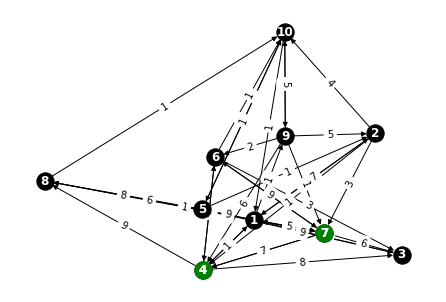

Кратчайший путь № 1 : 4->6->7 ; его вес: 3


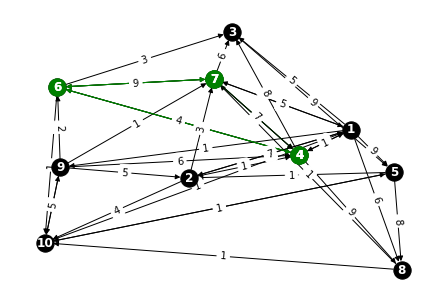

Кратчайший путь № 2 : 4->1->9->7 ; его вес: 3


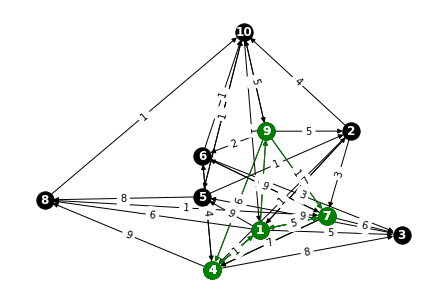

Кратчайший путь № 3 : 4->1->9->6->7 ; его вес: 3


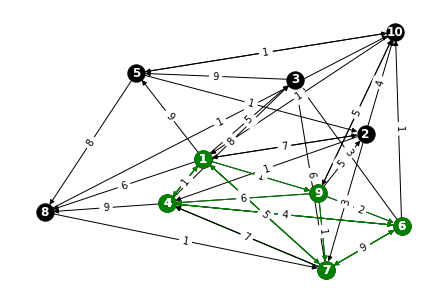

Кратчайший путь № 4 : 4->1->9->2->7 ; его вес: 3


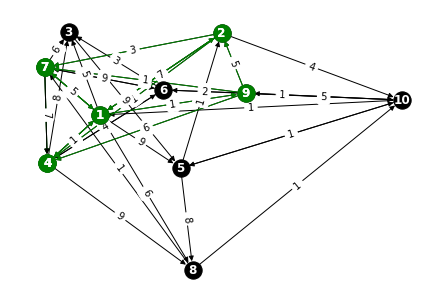

--- 1717.421 ms ---


In [10]:
# Алгоритм Йена
def Yen_algorithm(graph, start, end, K):
    # "поймать" ошибку в случае, если путей от start до end нет
    try:
        # определяем первый кратчайший путь и его вес
        paths = [nx.dijkstra_path(graph, start, end)]
        weights = [nx.dijkstra_path_length(graph, start, end)]
    except BaseException:
        return None, None
    
    PriorityQueue = queue.PriorityQueue() # кандидаты
    
    # организуем ветвление, чтобы найти новый путь
    for k in range(1, K):
        # от первого узла до последнего в пред. крат. пути
        for i in range(len(paths[k - 1]) - 1):
            branch_node = paths[k - 1][i] # узел ветвления (из пред. кр. пути)
            root_path = paths[k - 1][:i] # корневой путь - (начальная часть предыдушего пути (до узла ветвления))
            removed_edges = [] # удаленные рёбра

            for path in paths:
                # если ребро есть в пред. кр. пути и в корн. пути, но удаляем его
                if len(path) - 1 > i and root_path == path[:i] and graph.has_edge(path[i], path[i + 1]):
                    edge_weight = graph.edges[path[i], path[i + 1]]['weight'] # вес удал. рёбра
                    removed_edges.append((path[i], path[i + 1], edge_weight))
                    graph.remove_edge(path[i], path[i + 1])

            # если есть путь, то далее просто находим его после удаления связи
            if nx.has_path(graph, branch_node, end):
                # находим новый путь
                spur_path = nx.dijkstra_path(graph, branch_node, end)

                # собираем новый путь от start до end и определяем его вес
                total_path = root_path + spur_path
                total_path_cost = nx.dijkstra_path_length(graph, total_path[0], total_path[-1])

                # в список кандидатов этот новый путь
                PriorityQueue.put((total_path_cost, total_path))

            # возвращаем удалённые рёбра в граф
            graph.add_weighted_edges_from(removed_edges)

        # из очереди берём путь с наим. весом и добавляем в paths, weights
        while not PriorityQueue.empty():
            cost_, path_ = PriorityQueue.get()
            if path_ not in paths:
                paths.append(path_)
                weights.append(cost_)
                break

    return paths, weights

matrix = read_matrix('10x10_many_matrix.txt')
print("Матрица смежности:", matrix)
graph = create_graph(matrix)
path = []
        
start_time = time.perf_counter()  
start = 4
end = 7
amount = 4

graph_visualization(graph, path, start, end)

paths, weights = Yen_algorithm(graph, start, end, amount)
# print(paths)
# print(weights)

if paths == None or weights == None: print("Невозможно добраться от узла", start, "до узла", end) 
else:
    if len(weights) == amount:
        for i in range(amount):
            s = ""
            for el in paths[i]: 
                s += str(el)
                s += "->"
            print("Кратчайший путь №", i+1, ":", s[:len(s)-2], "; его вес:", weights[i])
            graph = create_graph(matrix)
            graph_visualization(graph, paths[i], start, end)
    else:
        print("Введённое число больше количества возможных путей. Найдено", len(weights))
        for i in range(len(weights)):
            s = ""
            for el in paths[i]: 
                s += str(el)
                s += "->"
            print("Кратчайший путь №", i+1, ":", s[:len(s)-2], "; его вес:", weights[i])
            graph = create_graph(matrix)
            graph_visualization(graph, paths[i], start, end)

print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

### Вывод

In [11]:
table = [["Алгоритм Флойда-Уоршелла", "0.326 ms", "0.283 ms", "0.887 ms", "0.263 ms", "0.435 ms", "0.431 ms"],
        ["Алгоритм Дейкстры", "0.950 ms", "0.540 ms", "0.418 ms", "0.307 ms", "0.300 ms", "0.747 ms"],
        ["Алгоритм Беллмана-Форда", "0.247 ms", "0.259 ms", "0.423 ms", "0.498 ms", "0.394 ms", "0.923 ms"],
        ["Алгоритм Джонсона", "0.458 ms", "0.398 ms", "0.578 ms", "0.615 ms", "1.303 ms", "1.439 ms"],
        ["Алгоритм Левита", "0.282 ms", "0.670 ms", "0.295 ms", "0.489 ms", "0.622 ms", "0.395 ms"],
        ["Алгоритм Йена", "230.624 ms", "236.713 ms", "589.345 ms", "315.591 ms", "382.712 ms", "622.192 ms"]]

pd.DataFrame(table, columns=["Алгоритм","Матрица 4х4 (мало узлов и ребер)", "Матрица 4х4 (много узлов и ребер)","Матрица 6х6 (мало узлов и ребер)", "Матрица 6х6 (много узлов и ребер)","Матрица 10х10 (мало узлов и ребер)", "Матрица 10х10 (много узлов и ребер)"])

,Алгоритм,Матрица 4х4 (мало узлов и ребер),Матрица 4х4 (много узлов и ребер),Матрица 6х6 (мало узлов и ребер),Матрица 6х6 (много узлов и ребер),Матрица 10х10 (мало узлов и ребер),Матрица 10х10 (много узлов и ребер)
0,Алгоритм Флойда-Уоршелла,0.326 ms,0.283 ms,0.887 ms,0.263 ms,0.435 ms,0.431 ms
1,Алгоритм Дейкстры,0.950 ms,0.540 ms,0.418 ms,0.307 ms,0.300 ms,0.747 ms
2,Алгоритм Беллмана-Форда,0.247 ms,0.259 ms,0.423 ms,0.498 ms,0.394 ms,0.923 ms
3,Алгоритм Джонсона,0.458 ms,0.398 ms,0.578 ms,0.615 ms,1.303 ms,1.439 ms
4,Алгоритм Левита,0.282 ms,0.670 ms,0.295 ms,0.489 ms,0.622 ms,0.395 ms
5,Алгоритм Йена,230.624 ms,236.713 ms,589.345 ms,315.591 ms,382.712 ms,622.192 ms


Вывод:в ходе лабораторной работы были реализованы алгоритмы поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа: Алгоритм Флойда-Уоршелла; Алгоритм Дейкстры; Алгоритм Беллмана-Форда; Алгоритм Джонсона; Алгоритм Левита; Алгоритм Йена. Также было предусмотрено задание графа в виде матрицы смежности, читаемой из файла, и был разработан графический интерфейс с визуализацией графа и отображением кратчайшего расстояния между вершинами. 
По результатам анализа временной сложности работы заданного алгоритма в зависимости от числа узлов и ребер графа было выяснено, что самым затратным является Алгоритм Йена.